## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Read the dataset

In [2]:
# Loading the dataset
file_path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'

data = pd.read_csv(file_path)
print(f'dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

dataset contains 7043 rows and 21 columns


In [3]:
data.head(10)

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
data.drop('customerID',axis='columns',inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   int64  
 2   Is_Married         7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Dual               7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

## Coverting Some of the Object Datatype Columns to Numerical

In [6]:
# Total_charges column should be of numerical type
data['Total_Charges'] = data['Total_Charges'].apply(pd.to_numeric, errors='coerce') # invalid parsing will be set as NaN

## Checking Null Values

In [7]:
data.isnull().sum()

,0
gender,0
Senior_Citizen,0
Is_Married,0
Dependents,0
tenure,0
Phone_Service,0
Dual,0
Internet_Service,0
Online_Security,0
Online_Backup,0


In [8]:
# Check rows where Total_Charges is NaN
nan_rows = data[data['Total_Charges'].isna()]
print(nan_rows)

      gender  Senior_Citizen  Is_Married Dependents  tenure Phone_Service  \
488   Female                0        Yes        Yes       0            No   
753     Male                0         No        Yes       0           Yes   
936   Female                0        Yes        Yes       0           Yes   
1082    Male                0        Yes        Yes       0           Yes   
1340  Female                0        Yes        Yes       0            No   
3331    Male                0        Yes        Yes       0           Yes   
3826    Male                0        Yes        Yes       0           Yes   
4380  Female                0        Yes        Yes       0           Yes   
5218    Male                0        Yes        Yes       0           Yes   
6670  Female                0        Yes        Yes       0           Yes   
6754    Male                0         No        Yes       0           Yes   

                  Dual Internet_Service      Online_Security  \
488   No ph

In [9]:
# Due to the dataset being big i decided to drop the rows

# Drop rows with NaN in the 'Total_Charges' column
data = data.dropna(subset=['Total_Charges'])

In [10]:
data['Total_Charges'].isnull().sum()

0

## Checking Duplicates


In [11]:
data_dup = data.duplicated().any()
print(data_dup)
# data.drop_duplicates()

True


## Overall statistics about the dataset

In [12]:
data.describe()

,Senior_Citizen,tenure,Monthly_Charges,Total_Charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Data Visualization

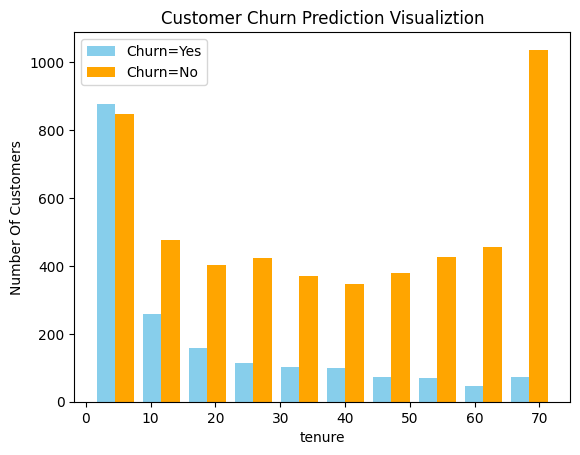

In [13]:
tenure_churn_no = data[data.Churn=='No'].tenure
tenure_churn_yes = data[data.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.8, color=['skyblue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

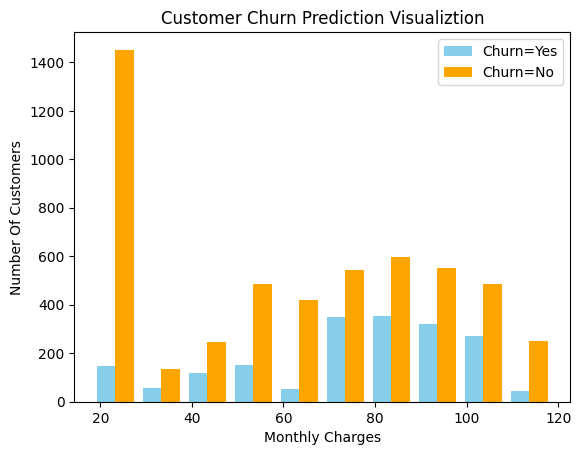

In [14]:
mc_churn_no = data[data.Churn=='No'].Monthly_Charges
mc_churn_yes = data[data.Churn=='Yes'].Monthly_Charges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.8, color=['skyblue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

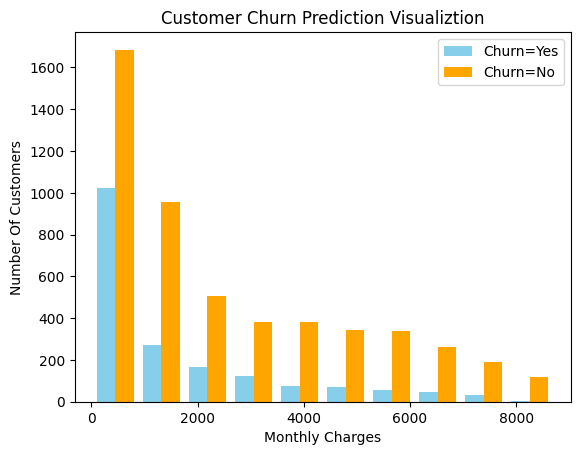

In [15]:
tc_churn_no = data[data.Churn=='No'].Total_Charges
tc_churn_yes = data[data.Churn=='Yes'].Total_Charges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tc_churn_yes, tc_churn_no], rwidth=0.8, color=['skyblue','orange'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Check Column Unique values

In [16]:
def check_unique(data):
    # Checking unique values to choose which technique to apply
    should_be_one_hot_encoded = []
    should_be_label_encoded = []

    for col in data.columns:
        if data[col].dtypes == 'object': # Exclude numerical values
            print(f'{col}: {data[col].unique()}')
            if len(data[col].unique()) > 2:
                should_be_one_hot_encoded.append(col)
            else:
                should_be_label_encoded.append(col)

    print('\nOne-Hot Encoded : ', should_be_one_hot_encoded, '\n')
    print('Label Encoded : ', should_be_label_encoded)
    return should_be_one_hot_encoded, should_be_label_encoded

should_be_one_hot_encoded, should_be_label_encoded = check_unique(data)

gender: ['Female' 'Male']
Is_Married: ['Yes' 'No']
Dependents: ['No' 'Yes']
Phone_Service: ['No' 'Yes']
Dual: ['No phone service' 'No' 'Yes']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Online_Security: ['No' 'Yes' 'No internet service']
Online_Backup: ['Yes' 'No' 'No internet service']
Device_Protection: ['No' 'Yes' 'No internet service']
Tech_Support: ['No' 'Yes' 'No internet service']
Streaming_TV: ['No' 'Yes' 'No internet service']
Streaming_Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
Paperless_Billing: ['Yes' 'No']
Payment_Method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']

One-Hot Encoded :  ['Dual', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Payment_Method'] 

Label Encoded :  ['gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Paperless_Billing', 'Churn']


## Handling Hidden Redundancy

In [17]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [18]:
should_be_one_hot_encoded, should_be_label_encoded = check_unique(data)

gender: ['Female' 'Male']
Is_Married: ['Yes' 'No']
Dependents: ['No' 'Yes']
Phone_Service: ['No' 'Yes']
Dual: ['No' 'Yes']
Internet_Service: ['DSL' 'Fiber optic' 'No']
Online_Security: ['No' 'Yes']
Online_Backup: ['Yes' 'No']
Device_Protection: ['No' 'Yes']
Tech_Support: ['No' 'Yes']
Streaming_TV: ['No' 'Yes']
Streaming_Movies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
Paperless_Billing: ['Yes' 'No']
Payment_Method: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']

One-Hot Encoded :  ['Internet_Service', 'Contract', 'Payment_Method'] 

Label Encoded :  ['gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Dual', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Paperless_Billing', 'Churn']


## Label Encoding

In [19]:
le = LabelEncoder()
for col in should_be_label_encoded:
    data[col] = le.fit_transform(data[col]) # Apply label encoding for each column

for col in should_be_label_encoded:
    print(f'{col}: {data[col].unique()}')

gender: [0 1]
Is_Married: [1 0]
Dependents: [0 1]
Phone_Service: [0 1]
Dual: [0 1]
Online_Security: [0 1]
Online_Backup: [1 0]
Device_Protection: [0 1]
Tech_Support: [0 1]
Streaming_TV: [0 1]
Streaming_Movies: [0 1]
Paperless_Billing: [1 0]
Churn: [0 1]


## One-Hot Encoding

In [20]:
data_dumm = pd.get_dummies(data=data, columns=should_be_one_hot_encoded)
print(should_be_one_hot_encoded)
print(data_dumm.columns)

['Internet_Service', 'Contract', 'Payment_Method']
Index(['gender', 'Senior_Citizen ', 'Is_Married', 'Dependents', 'tenure',
       'Phone_Service', 'Dual', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'Paperless_Billing', 'Monthly_Charges', 'Total_Charges', 'Churn',
       'Internet_Service_DSL', 'Internet_Service_Fiber optic',
       'Internet_Service_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Payment_Method_Bank transfer (automatic)',
       'Payment_Method_Credit card (automatic)',
       'Payment_Method_Electronic check', 'Payment_Method_Mailed check'],
      dtype='object')


In [21]:
data_dumm.head()

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Online_Security,Online_Backup,Device_Protection,...,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [22]:
data_dumm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender                                    7032 non-null   int64  
 1   Senior_Citizen                            7032 non-null   int64  
 2   Is_Married                                7032 non-null   int64  
 3   Dependents                                7032 non-null   int64  
 4   tenure                                    7032 non-null   int64  
 5   Phone_Service                             7032 non-null   int64  
 6   Dual                                      7032 non-null   int64  
 7   Online_Security                           7032 non-null   int64  
 8   Online_Backup                             7032 non-null   int64  
 9   Device_Protection                         7032 non-null   int64  
 10  Tech_Support                             

## Feature Scaling

In [23]:
cols_to_scale = ['tenure','Monthly_Charges','Total_Charges']
scaler = MinMaxScaler()
data_dumm[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [24]:
data_dumm.head()

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Online_Security,Online_Backup,Device_Protection,...,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


## Splitting The Data Into Training and Test Sets



In [25]:
X = data_dumm.drop('Churn',axis='columns')
y = data_dumm['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [26]:
X_train.head()

,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Online_Security,Online_Backup,Device_Protection,...,Internet_Service_DSL,Internet_Service_Fiber optic,Internet_Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,0,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,1,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,0,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,1,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False


In [27]:
y_train.head()

,Churn
5664,1
101,0
2621,0
392,0
1327,1


In [28]:
from imblearn.combine import SMOTEENN
smote = SMOTEENN(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

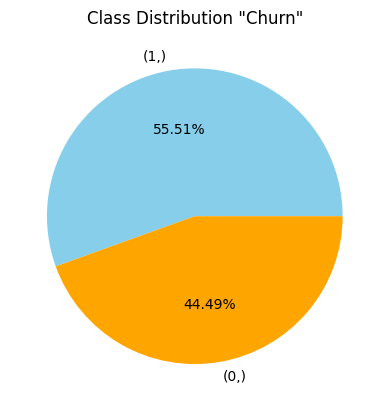

In [29]:
pd.DataFrame(y_train).value_counts().plot.pie(autopct='%1.2f%%', colors=['skyblue', 'orange'])
plt.title('Class Distribution "Churn"')
plt.ylabel('')
plt.show()

## ANN

In [45]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7118 - loss: 0.5271
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.2550
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9178 - loss: 0.2090
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9319 - loss: 0.1888
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.1931
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9273 - loss: 0.1785
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9311 - loss: 0.1778
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9290 - loss: 0.1780
Epoch 9/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9354 - loss: 0.1674
Epoch 10/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9342 - loss: 0.1688
Epoch 11/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9380 - loss: 0.1520
Epoch 12/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [46]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 1.1145


[1.080497145652771, 0.7285003662109375]

In [47]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[699 300]
 [ 82 326]]
0.728500355366027


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       999
           1       0.52      0.80      0.63       408

    accuracy                           0.73      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.79      0.73      0.74      1407

